In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [29]:
data = pd.read_csv("/Users/tgut03/Jupyter/Data/Netflix Titles.csv")
data.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300


In [30]:
dataInfo = pd.DataFrame(columns = ["Name", "Type", "Non-Nulls", "Nulls", "Uniques", "Dups"])

for column in data.columns :
    name = column
    type = data[column].dtype
    nonNulls = data[column].notnull().sum()
    nulls = data[column].isnull().sum()
    uniques = data[column].nunique()
    dups = data[column].duplicated().sum()
    
    dataInfo = pd.concat([dataInfo, pd.DataFrame({
"Name" : [name],
"Type" : [type],
"Non-Nulls" : [nonNulls],
"Nulls" : [nulls],
"Uniques" : [uniques],
"Dups" : [dups]
    })], ignore_index = True)
dataInfo

,Name,Type,Non-Nulls,Nulls,Uniques,Dups
0,id,object,5850,0,5850,0
1,title,object,5849,1,5798,51
2,type,object,5850,0,2,5848
3,description,object,5832,18,5829,20
4,release_year,int64,5850,0,63,5787
5,age_certification,object,3231,2619,11,5838
6,runtime,int64,5850,0,202,5648
7,genres,object,5850,0,1726,4124
8,production_countries,object,5850,0,452,5398
9,seasons,float64,2106,3744,26,5823


## Clean Data

In [31]:
# Replace Null Numbers With 0
nullNumbers = data.select_dtypes(include = "number").columns.tolist()
data[nullNumbers] = data[nullNumbers].fillna(0)
null = data.isnull().sum().sort_values(ascending = False)
print(null)

age_certification       2619
imdb_id                  403
description               18
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64


In [32]:
# Replace Null Text With N/A
nullText = data.select_dtypes(exclude="number").columns.tolist()
data[nullText] = data[nullText].fillna("N/A")
null = data.isnull().sum().sort_values(ascending=False)
print(null)

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


# Explore Data

Hypothesis = There is a positive correlation between IMDB scores and TMDB scores

In [33]:
# Score Frequency
IMDB = data["imdb_score"].round().value_counts().rename("IMDB")
TMDB = data["tmdb_score"].round().value_counts().rename("TMDB")
scoreFrequency = pd.concat([IMDB, TMDB],axis = 1)
scoreFrequency

,IMDB,TMDB
7.0,1687.0,1860
6.0,1630.0,1538
8.0,1028.0,1292
5.0,603.0,399
0.0,482.0,312
4.0,242.0,116
9.0,95.0,195
3.0,58.0,18
2.0,22.0,19
10.0,3.0,91


In [34]:
# Summarize Score
IMDB = data["imdb_score"].describe().round(1).rename("IMDB")
TMDB = data["tmdb_score"].describe().round(1).rename("TMDB")
scoreSummary = pd.concat([IMDB, TMDB], axis = 1)
scoreSummary

,IMDB,TMDB
count,5850.0,5850.0
mean,6.0,6.5
std,2.1,1.9
min,0.0,0.0
25%,5.5,6.0
50%,6.5,6.8
75%,7.3,7.5
max,9.6,10.0


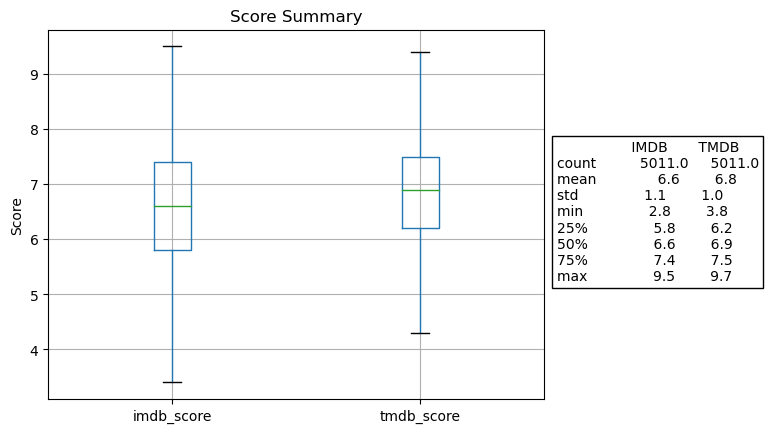

In [35]:
# IMDB Outliers
imdbIQR = data["imdb_score"].quantile(0.75) - data["imdb_score"].quantile(0.25)
lowerIMDB = data["imdb_score"].quantile(0.25) - (1.5 * (imdbIQR)).round(1)
upperIMDB = data["imdb_score"].quantile(0.75) + (1.5 * (imdbIQR)).round(1)

# TMDB Outliers
tmdbIQR = data["tmdb_score"].quantile(0.75) - data["tmdb_score"].quantile(0.25)
lowerTMDB = data["tmdb_score"].quantile(0.25) - (1.5 * (tmdbIQR)).round(1)
upperTMDB = data["tmdb_score"].quantile(0.75) + (1.5 * (tmdbIQR)).round(1)

# Remove Outliers
data = data[(data["imdb_score"] >= lowerIMDB) & (data["imdb_score"] <= upperIMDB)]
data = data[(data["tmdb_score"] >= lowerTMDB) & (data["tmdb_score"] <= upperTMDB)]

# Summarize Score
IMDB = data["imdb_score"].describe().round(1).rename("IMDB")
TMDB = data["tmdb_score"].describe().round(1).rename("TMDB")
scoreSummary = pd.concat([IMDB, TMDB], axis = 1)

# Table
table = scoreSummary.to_string(col_space = 10)
plt.text(2.55, 6.5, table, ha = "left", va = "center", bbox = dict(boxstyle = "square", facecolor = "white"))

# Boxplot
data.boxplot(column = ["imdb_score", "tmdb_score"], showfliers=False)
plt.ylabel("Score")
plt.title("Score Summary")
plt.show()

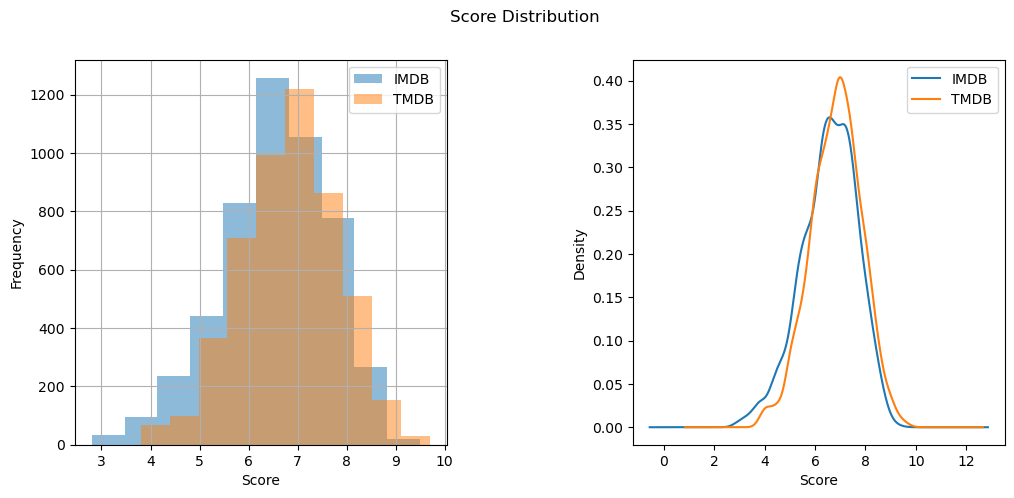

In [36]:
# 1 Figure 2 Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Histogram
data["imdb_score"].hist(alpha = 0.5, label = "IMDB", ax = ax1)
data["tmdb_score"].hist(alpha = 0.5, label = "TMDB", ax = ax1)
ax1.set_xlabel("Score")
ax1.set_ylabel("Frequency")
ax1.legend()

# Kernel Density Estimate
data["imdb_score"].plot.kde(label = "IMDB", ax = ax2)
data["tmdb_score"].plot.kde(label = "TMDB", ax = ax2)
ax2.set_xlabel("Score")
ax2.set_ylabel("Density")
ax2.legend()

plt.subplots_adjust(wspace = 0.5)
fig.suptitle("Score Distribution")
plt.show()

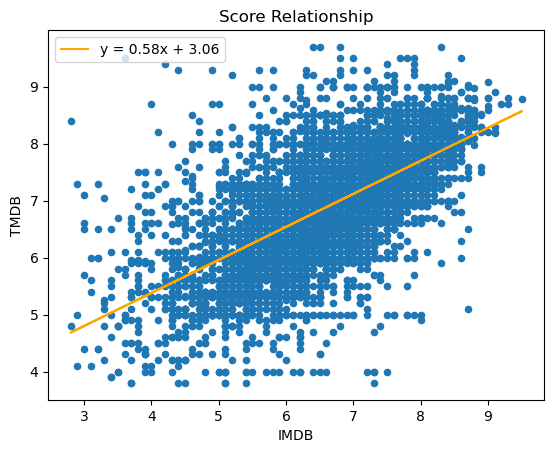

In [37]:
# Scatterplot
data.plot.scatter(x = "imdb_score",y = "tmdb_score")
x = plt.xlabel("IMDB")
y = plt.ylabel("TMDB")

# Calculate Trendline
coefficient = np.polyfit(data["imdb_score"], data["tmdb_score"], 1).round(2)
m = coefficient[0]  # Slope
b = coefficient[1]  # Intercept

# Equation
trendlineEq = (f"y = {m}x + {b}")

# Plot Trendline
plt.plot(data["imdb_score"], m * data["imdb_score"] + b, color = "orange", label = trendlineEq)
title = plt.title("Score Relationship")
legend = plt.legend()
plt.show()

In [55]:
# Test Hypothesis
corr, pValue = stats.pearsonr(data["imdb_score"], data["tmdb_score"])
if corr > 0.0 and pValue < 0.05 : # Default Confidence Interval = 0.95
    print(f"""There is a positive correlation between IMDB scores and TMDB scores
    because the correlation coefficient = {corr.round(2)} and the p-value = {pValue}.""")

There is a positive correlation between IMDB scores and TMDB scores
    because the correlation coefficient = 0.63 and the p-value = 0.0.
